## Waste Management Using CNN  

In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# pip install tersorflow

In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import cv2

from tqdm import tqdm

import warnings

warnings.filterwarnings('ignore')

In [4]:
train_path = "dataset/TRAIN" 
test_path = "dataset/TEST"

In [5]:
#import libraries
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from tensorflow.keras.utils import plot_model

from glob import glob

In [6]:
#visualization

x_data = []

y_data = []

for category in glob(train_path+"/*"):

    for file in tqdm(glob(category+"/*")):

        img_array = cv2.imread(file)

        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        
        x_data.append(img_array)

        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [01:48<00:00, 92.06it/s] 


In [7]:
data.info
data.shape

(22564, 2)

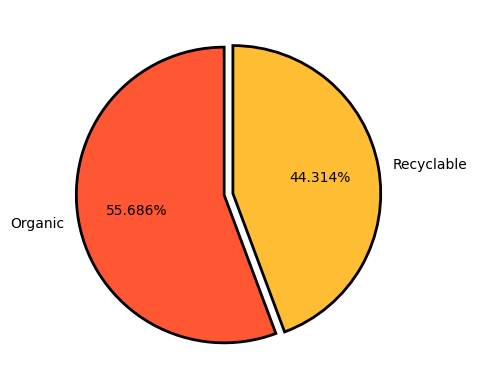

In [8]:
colors = ["#ff5733", "#ffbd33"]
plt.pie(
    data.label.value_counts(),
    labels=["Organic","Recyclable"],
    autopct='%0.3f%%',
    colors=colors[:2],
    startangle=90,
    explode=[0.03,0.03],
    wedgeprops={'edgecolor':'black','linewidth':2}
)
plt.show()

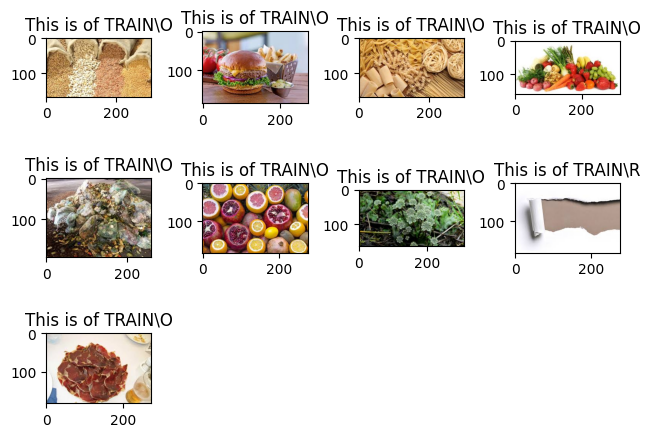

In [13]:
plt.Figure(figsize=(20, 20)) 
for i in range(9):
    plt.subplot(3, 4, (i%12)+1)
    index = np.random.randint(18000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Conventional Neural Network 

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
batch_size = 256

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:
hist=model.fit(
    train_generator,
    epochs=12,
    validation_data=test_generator
)

Epoch 1/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 525s 6s/step - accuracy: 0.7807 - loss: 0.5089 - val_accuracy: 0.8683 - val_loss: 0.3543
Epoch 2/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 505s 6s/step - accuracy: 0.8298 - loss: 0.4163 - val_accuracy: 0.8902 - val_loss: 0.2934
Epoch 3/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.8394 - loss: 0.3866 - val_accuracy: 0.8922 - val_loss: 0.2751
Epoch 4/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.8605 - loss: 0.3498 - val_accuracy: 0.8977 - val_loss: 0.2771
Epoch 5/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.8740 - loss: 0.3144 - val_accuracy: 0.8782 - val_loss: 0.3128
Epoch 6/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.8827 - loss: 0.2982 - val_accuracy: 0.8786 - val_loss: 0.2913
Epoch 7/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 307s 3s/step - accuracy: 0.8976 - loss: 0.2631 - val_accuracy: 0.9025 - val_loss: 0.2687
Epoch 8/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.9094 - loss: 0.2365 - val_accuracy: 0.8739 - v

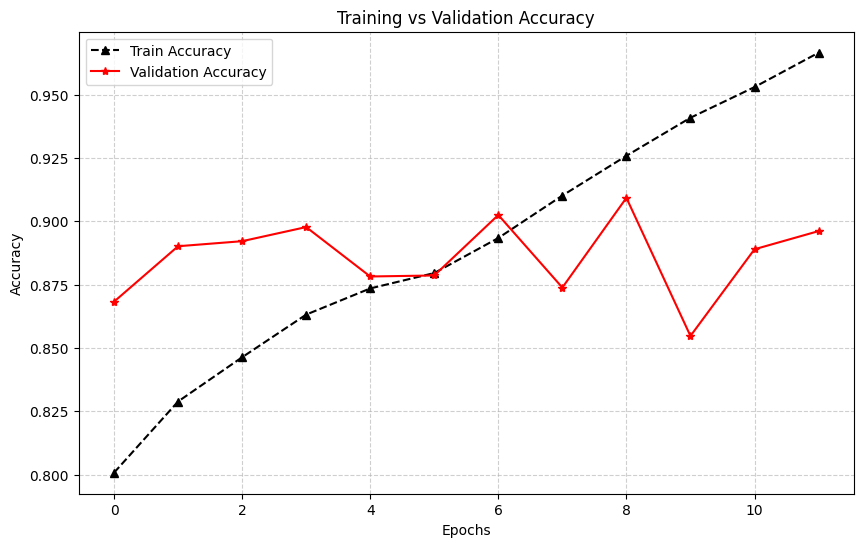

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='black', marker='^', linestyle='--')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='red', marker='*', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


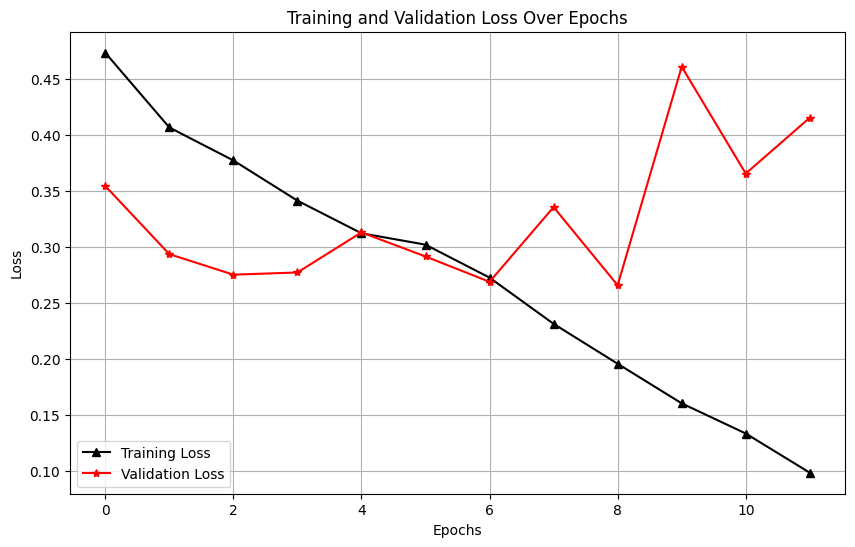

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], 'k-^', label='Training Loss') 
plt.plot(hist.history['val_loss'], 'r-*', label='Validation Loss')  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The image shown is Organic Waste


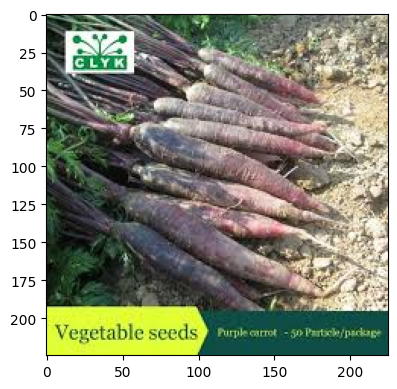

In [47]:
test_img=cv2.imread(r"C:\Users\reddy\OneDrive\Desktop\Workspace\Dataset\TEST\O\O_12584.jpg")
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
The image shown is Recyclable Waste


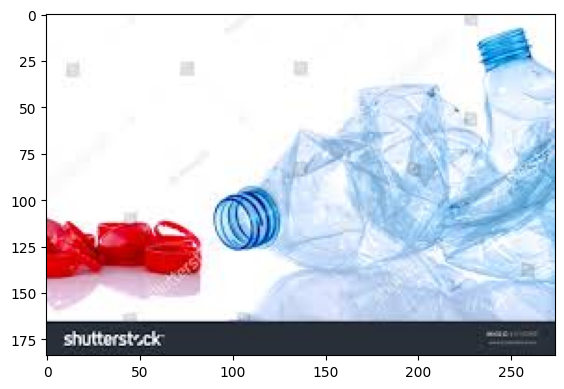

In [48]:
test_img=cv2.imread(r"C:\Users\reddy\OneDrive\Desktop\Workspace\Dataset\TRAIN\R\R_58.jpg")
predict_fun(test_img)